## Libraries and Data

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv("heart.csv")
data.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


## Data Exploration

In [3]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
# General One Person Data 
print(data.shape)
data.iloc[2,:]

(303, 14)


age          41.0
sex           0.0
cp            1.0
trtbps      130.0
chol        204.0
fbs           0.0
restecg       0.0
thalachh    172.0
exng          0.0
oldpeak       1.4
slp           2.0
caa           0.0
thall         2.0
output        1.0
Name: 2, dtype: float64

In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
for i in ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']:
    print(i, "  ", data[i].unique())
    
print(f"Total of {data.output.sum()} people diagnosed bad, out of {len(data)} patients")

sex    [1 0]
cp    [3 2 1 0]
fbs    [1 0]
restecg    [0 1 2]
exng    [0 1]
slp    [0 2 1]
caa    [0 2 1 3 4]
thall    [1 2 3 0]
output    [1 0]
Total of 165 people diagnosed bad, out of 303 patients


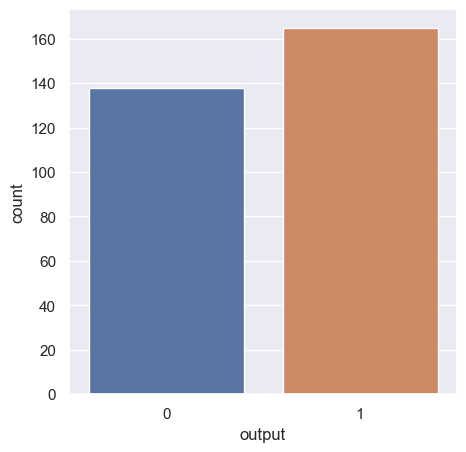

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(data=data, x='output')
plt.show()

# Splitting Data into Train and Test data

In [8]:
y = data.output
X = data.drop("output", axis =1)

In [9]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=42)
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2


# Encoding

In [10]:
lst = ['cp', 'restecg']

for i in lst:
    for j in X_train[i].unique():
        
        dummie = X_train[i] == j
        X_train[i + "_" + str(j)] = dummie * 1
        
        dummie = X_test[i] == j
        X_test[i + "_" + str(j)] = dummie * 1
        
X_train = X_train.drop(lst, axis = 1)
X_test = X_test.drop(lst, axis = 1)

In [11]:
X_train.columns

Index(['age', 'sex', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak',
       'slp', 'caa', 'thall', 'cp_1', 'cp_2', 'cp_0', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2'],
      dtype='object')

we can remove 'cp_0', 'restecg_0', since they are duplicates

In [12]:
column_list = ['age', 'sex', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak',
                   'slp', 'caa', 'thall', 'cp_1', 'cp_2', 'cp_3','restecg_1', 'restecg_2']

X_train = X_train[column_list]
X_test = X_test[column_list]

# Heat map

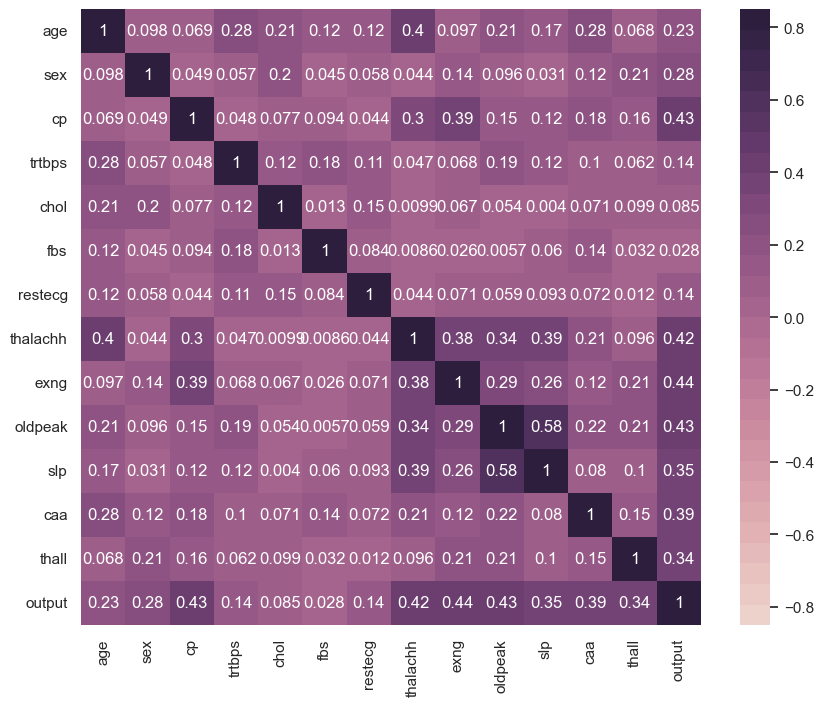

In [13]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr().abs(), cmap = sns.cubehelix_palette(30), annot = True, vmin=-0.85, vmax=0.85)
plt.savefig('images/before.png')

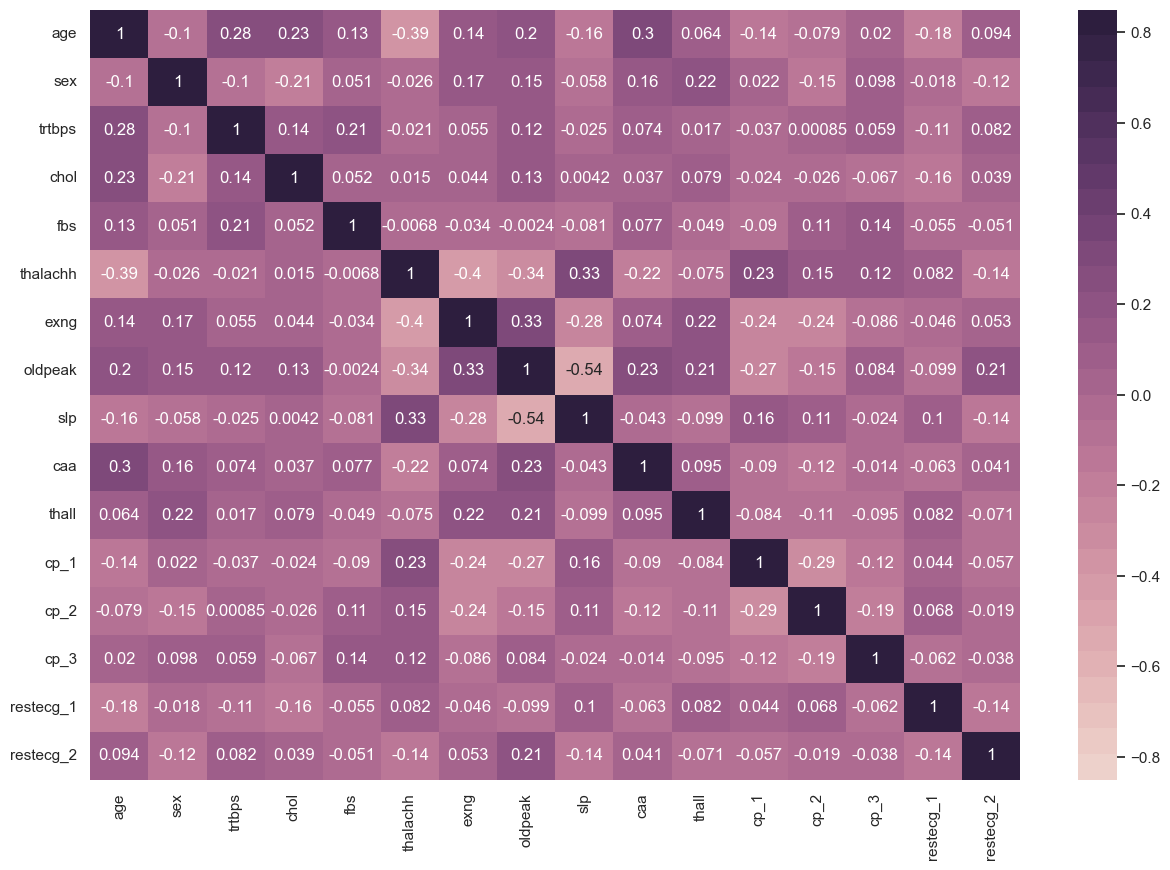

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(X_train.corr(), cmap = sns.cubehelix_palette(30), annot = True, vmin=-0.85, vmax=0.85)
plt.savefig('images/before.png')

#### Everything is fine

In [15]:
df = X_train.iloc[:,[0,2,3,5,7]]
df.loc[:,"output"] = y_train
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_12872\1691760929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"output"] = y_train


,age,trtbps,chol,thalachh,oldpeak,output
287,57,154,232,164,0.0,0
282,59,126,218,134,2.2,0
197,67,125,254,163,0.2,0
158,58,125,220,144,0.4,1
164,38,138,175,173,0.0,1


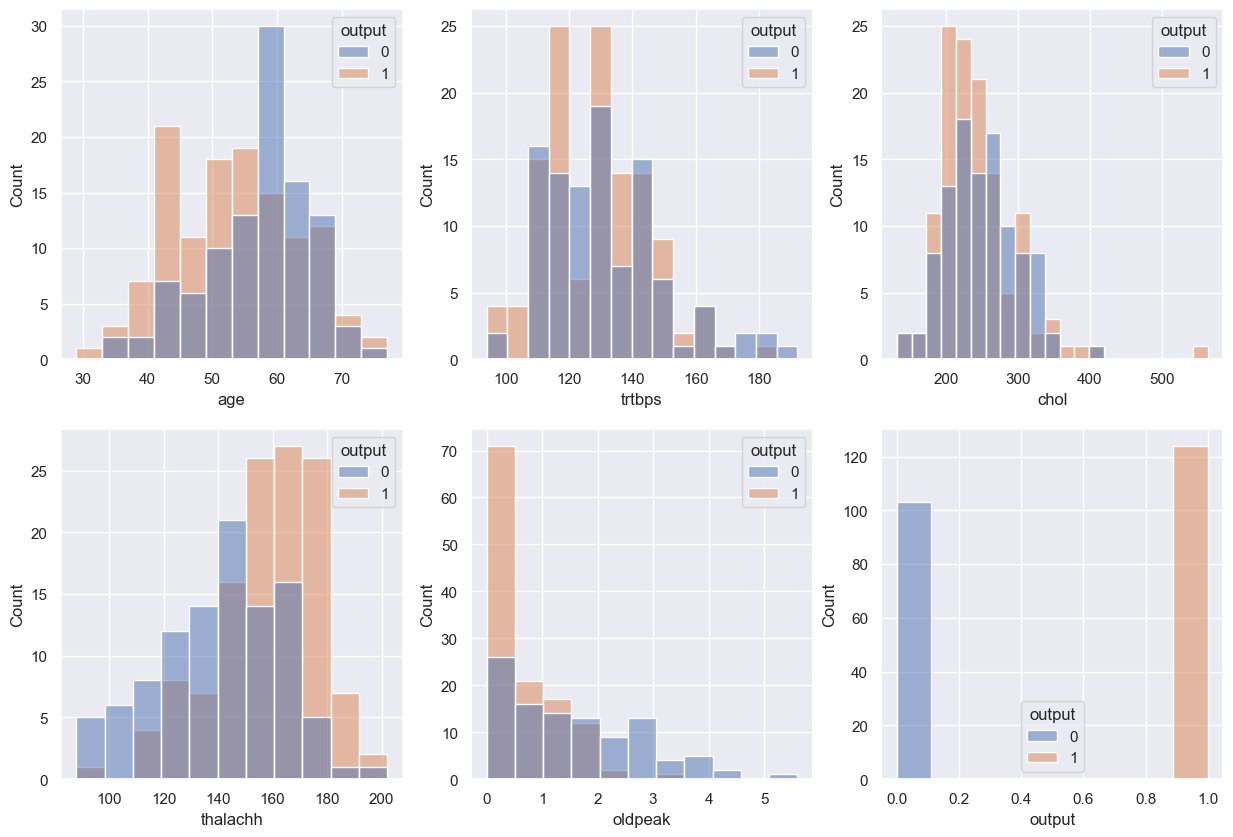

In [16]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))
a = 0
for i in range(2):
    for j in range(3):
        sns.histplot(df, x=df.columns[a], element = "bars", ax = ax[i,j], hue = "output" )
        a = a+1
        
plt.savefig('images/histplot.png')

C:\Users\User\AppData\Local\Temp\ipykernel_12872\4117581130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"output"] = y_train
a:\UE Studies\Cloud-Computng\Final_Project_CC\xjcvhsldkj\Heart-Attact-Prediction-main\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


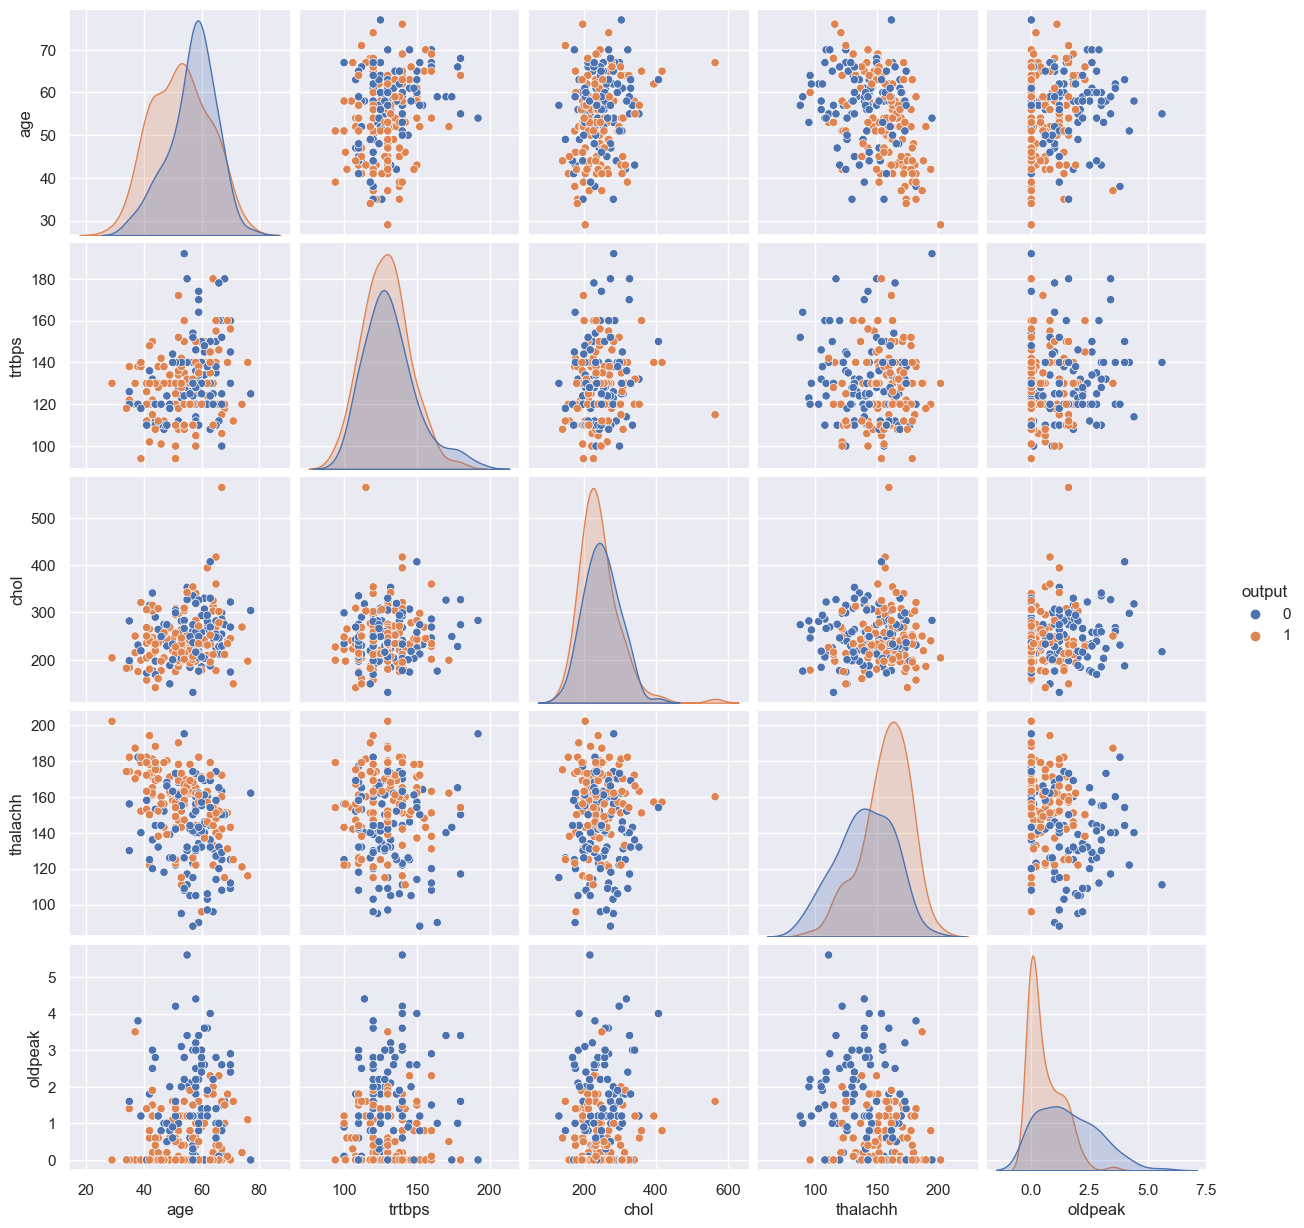

In [17]:
df = X_train.iloc[:,[0,2,3,5,7]]
df.loc[:,"output"] = y_train
sns.pairplot(df, hue="output")
plt.savefig('images/pairplot.png')

There are certainly some patterns to recognize Heart Attack chance is high or low, based on the above 2 plots.

## Scaling 

In [18]:
scalar = StandardScaler()
X_train_chenged = scalar.fit_transform(X_train)
X_test_chenged = scalar.transform(X_test)

# Final Model

In [19]:
finalmodel = GaussianNB()
finalmodel.fit(X_train,y_train)
mtx = metrics.confusion_matrix(y_test, finalmodel.predict(X_test))
print(f"accuracy = {round((mtx[0,0]+mtx[1,1])*100/len(y_test),2)}")
mtx

accuracy = 89.47


array([[31,  4],
       [ 4, 37]], dtype=int64)

## Creating Pickel File
To store final model

In [20]:
import pickle

# create a pickle file and name it anything and open it in write bites mode
file = open('ml_model.pkl', 'wb')

# now put the model in the pickle file
pickle.dump(finalmodel, file)

file.close()

## Checking whether it worked or not

In [21]:
savedmodel = open('ml_model.pkl','rb')
model = pickle.load(savedmodel)
savedmodel.close()

In [22]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)